# Preprocessing Data

In [0]:
import pickle
import numpy as np

dataset = []

with open("data.pkl", "rb") as file:
    dataset = pickle.load(file)

In [4]:
trainDataset = dataset["trainDataset"]
testDataset = dataset["testDataset"]

print("TrainDataset : {} TestDataset : {}".format(len(trainDataset), len(testDataset)))

TrainDataset : 60000 TestDataset : 27561


In [0]:
numOfClass = 10

trainX = [list(td["image"].flatten() / 255) for td in trainDataset]
trainY = np.eye(numOfClass)[np.array([td["label"] for td in trainDataset]).reshape(-1).tolist()]

testX = [list(td["image"].flatten() / 255) for td in testDataset]
testY = np.eye(numOfClass)[np.array([td["label"] for td in testDataset]).reshape(-1).tolist()]

In [6]:
print("trainX : " + str(np.array(trainX).shape))
print("trainY : " + str(np.array(trainY).shape))
print("testX : " + str(np.array(testX).shape))
print("testY : " + str(np.array(testY).shape))

trainX : (60000, 784)
trainY : (60000, 10)
testX : (27561, 784)
testY : (27561, 10)


In [7]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
def show_images(x, y, title_str):
    for c in range(1, 10):
        subplot(3, 3, c)
        i = randint(len(x)) 
        im = np.reshape(x[i], (28,28))
        axis("off")
        label = np.argmax(y[i]) 
        title("{} = {}".format(title_str, label))
        imshow(im, cmap='Greys')

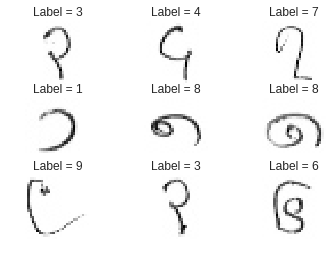

In [9]:
show_images(trainX, trainY, "Label")

# Import tensorflow and prepare for training

In [0]:
import tensorflow as tf

In [11]:
n_train = np.array(trainX).shape[0]
n_test = np.array(testX).shape[0]
print(n_train)
print(n_test)

60000
27561


In [0]:
n_input = 784
n_hidden1 = 512
n_hidden2 = 256
n_hidden3 = 128
n_output = 10

In [0]:
learning_rate = 1e-4
n_iterations = 500
dropout = 0.4

## Preparing tensorflow graph

In [0]:
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])
keep_prob = tf.placeholder(tf.float32)

In [0]:
weights = {
    "w1" : tf.Variable(tf.truncated_normal([n_input, n_hidden1], stddev = 0.1)),
    "w2" : tf.Variable(tf.truncated_normal([n_hidden1, n_hidden2], stddev = 0.1)),
    "w3" : tf.Variable(tf.truncated_normal([n_hidden2, n_hidden3], stddev = 0.1)),
    "out" : tf.Variable(tf.truncated_normal([n_hidden3, n_output], stddev = 0.1))
}

In [0]:
biases = {
    "b1" : tf.Variable(tf.constant(0.1, shape=[1, n_hidden1])),
    "b2" : tf.Variable(tf.constant(0.1, shape=[1, n_hidden2])),
    "b3" : tf.Variable(tf.constant(0.1, shape=[1, n_hidden3])),
    "out" : tf.Variable(tf.constant(0.1, shape=[1, n_output])),
}

In [0]:
Z1 = tf.add(tf.matmul(X, weights["w1"]), biases["b1"])
A1 = tf.nn.relu(Z1)

Z2 = tf.add(tf.matmul(A1, weights["w2"]), biases["b2"])
A2 = tf.nn.relu(Z2)

Z3 = tf.add(tf.matmul(A2, weights["w3"]), biases["b3"])
A3 = tf.nn.relu(Z3)

drop_layer = tf.nn.dropout(A3, keep_prob)
output_layer = tf.add(tf.matmul(A3, weights["out"]), biases["out"])

In [0]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=output_layer))
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

In [0]:
correct_pred = tf.equal(tf.argmax(output_layer, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

## Training and testing

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [23]:
for i in range(n_iterations):
  sess.run(train_step, feed_dict={X: trainX, Y: trainY, keep_prob : dropout})
  
  if i%100==0:
    train_loss, train_accuracy = sess.run([cross_entropy, accuracy], feed_dict={X: trainX, Y: trainY, keep_prob:1.0})
    print("Iteration", str(i), "\t| Loss =", str(train_loss), "\t| Accuracy =", str(train_accuracy))

Iteration 0 	| Loss = 2.463545 	| Accuracy = 0.0729
Iteration 100 	| Loss = 0.27255958 	| Accuracy = 0.9483
Iteration 200 	| Loss = 0.1027104 	| Accuracy = 0.97815
Iteration 300 	| Loss = 0.064207554 	| Accuracy = 0.9866167
Iteration 400 	| Loss = 0.046290234 	| Accuracy = 0.9903833
Iteration 500 	| Loss = 0.03525287 	| Accuracy = 0.9929


KeyboardInterrupt: ignored

In [24]:
test_accuracy = sess.run(accuracy, feed_dict={X: testX, Y:testY, keep_prob:1.0})
print("Accuracy on train set : "+str(train_accuracy))
print("Accuracy on test set : "+str(test_accuracy))

Accuracy on train set : 0.9929
Accuracy on test set : 0.987446
